# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Query URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# Create lists to for appending API data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter for Record and Set
city_record = 0
city_set = 1

# Set today's test date
today = time.strftime('(%m/%d/%Y)')

# Print header line
print("Beginning Data Retrieval")
print("-----------------------------")

# for loop for cities
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        # example has records count to 49 then reset to 0 and start a new set, recreating with if statement
        if city_record > 48:
            city_record = 0 # reset the record counter
            city_set +=1
            
        else:
            city_record += 1
            
        print(f"Processing Record {city_record} of Set {city_set} | {city}")

    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | urrao
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | cap-aux-meules
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | bose
Processing Record 14 of Set 1 | alice springs
City not found. Skipping...
Processing Record 15 of Set 1 | dingle
Processing Record 16 of Set 1 | mahon
Processing Record 17 of Set 1 | camabatela
Processing Record 18 of Set 1 | poum
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | victoria
Processing Reco

Processing Record 30 of Set 4 | preobrazheniye
Processing Record 31 of Set 4 | aljezur
Processing Record 32 of Set 4 | eureka
Processing Record 33 of Set 4 | berlevag
Processing Record 34 of Set 4 | arlit
Processing Record 35 of Set 4 | monrovia
Processing Record 36 of Set 4 | ojinaga
Processing Record 37 of Set 4 | vostok
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | waipawa
Processing Record 40 of Set 4 | najran
Processing Record 41 of Set 4 | aksha
Processing Record 42 of Set 4 | qasigiannguit
Processing Record 43 of Set 4 | aberdeen
Processing Record 44 of Set 4 | tashtyp
Processing Record 45 of Set 4 | ilulissat
Processing Record 46 of Set 4 | salta
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | coahuayana
Processing Record 0 of Set 5 | rio gallegos
Processing Record 1 of Set 5 | samfya
Processing Record 2 of Set 5 | wladyslawowo
Processing Record 3 of Set 5 | cururupu
Processing 

Processing Record 19 of Set 8 | mareeba
Processing Record 20 of Set 8 | roma
Processing Record 21 of Set 8 | port macquarie
Processing Record 22 of Set 8 | nizhnyaya poyma
Processing Record 23 of Set 8 | yarensk
Processing Record 24 of Set 8 | ormara
Processing Record 25 of Set 8 | bria
Processing Record 26 of Set 8 | trairi
Processing Record 27 of Set 8 | nara
Processing Record 28 of Set 8 | amahai
Processing Record 29 of Set 8 | raudeberg
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | inuvik
Processing Record 32 of Set 8 | suntar
Processing Record 33 of Set 8 | cape coast
Processing Record 34 of Set 8 | emerald
Processing Record 35 of Set 8 | hofn
Processing Record 36 of Set 8 | teahupoo
Processing Record 37 of Set 8 | saskylakh
Processing Record 38 of Set 8 | rawson
Processing Record 39 of Set 8 | manitouwadge
Processing Record 40 of Set 8 | lakes entrance
Processing Record 41 of Set 8 | moron
Processing Record 42 of Set 8 | erenhot
Processing Record 43

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame - first creating a dictionary, then building a dataframe from the dictionary
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [7]:
# Export the city data into a csv
weather_df.to_csv('output_data/weather_data.csv')

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Urrao,20,CO,1578442303,53,6.32,-76.13,75.20,16.11
1,Qaanaaq,15,GL,1578442303,81,77.48,-69.36,-25.51,1.07
2,Tuktoyaktuk,40,CA,1578442304,66,69.44,-133.03,-32.80,11.41
3,Bilibino,0,RU,1578442304,90,68.06,166.44,-27.85,3.00
4,Torbay,90,CA,1578442304,79,47.66,-52.73,24.01,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

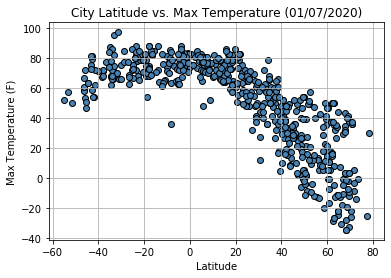

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_figures/Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

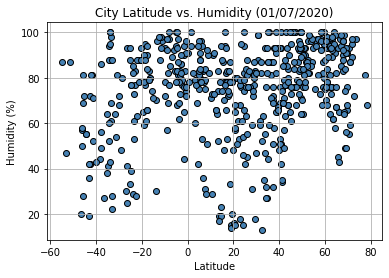

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_figures/Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

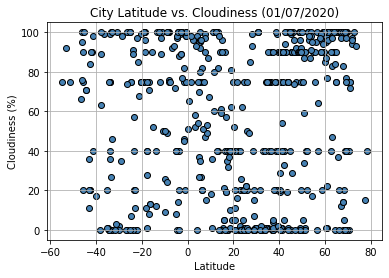

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_figures/Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

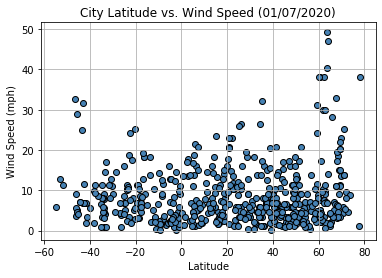

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", facecolors="steelblue", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_figures/Lat_vs_WindSpeed.png")

# Show plot
plt.show()